# Counting Rainy Days in Seattle
Imagine you have a series of data that represents the amount of precipitation (=amount of rain) each day for a year in a given city. For example, here we'll load the daily rainfall statistics for the city of Seattle in 2014, using Pandas.

> Note. In the following data file is located in sub-directory ./data

## Part 1
Read data in and plot some general info.

In [ ]:
# TODO: print first 4 lines from the file (check that the file exists)
# this command is jupyter notebook command rather than python
!type data\Seattle2014.csv

STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140106,3,0,0,78,-5,26,210,210,112,125,1,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140107,122,0,0,83,50,16,160,150,45,54,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT

In [2]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
print(rainfall)
# TODO: convert mm to inches and print shape (should be 365)
rainfall_in_inches = rainfall / 254.0
rainfall_in_inches.shape

[  0  41  15   0   0   3 122  97  58  43 213  15   0   0   0   0   0   0
   0   0   0   5   0   0   0   0   0  89 216   0  23  20   0   0   0   0
   0   0  51   5 183 170  46  18  94 117 264 145 152  10  30  28  25  61
 130   3   0   0   0   5 191 107 165 467  30   0 323  43 188   0   0   5
  69  81 277   3   0   5   0   0   0   0   0  41  36   3 221 140   0   0
   0   0  25   0  46   0   0  46   0   0   0   0   0   0   5 109 185   0
 137   0  51 142  89 124   0  33  69   0   0   0   0   0 333 160  51   0
   0 137  20   5   0   0   0   0   0   0   0   0   0   0   0   0  38   0
  56   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  18  64   0   5  36  13   0   8   3   0   0   0   0   0   0  18  23   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   3 193   0   0   0   0   0   0   0   0   0   5   0   0
   0   0   0   0   0   0   5 127 216   0  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  84  13   0  30   0   

(365,)

0.011811023622047244
0.19488188976377951
1.8385826771653544


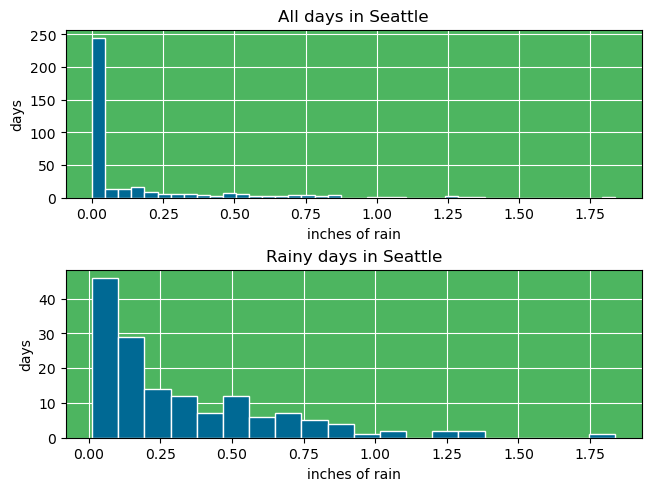

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

rainy_days = rainfall_in_inches > 0
#print(rainy_days)
#print(rainfall_in_inches[rainy_days])
print(np.min(rainfall_in_inches[rainy_days]))
print(np.median(rainfall_in_inches[rainy_days]))
print(np.max(rainfall_in_inches[rainy_days]))


# TODO: plot histogram (use 40 bins)
fig, (ax1, ax2) = plt.subplots(2, 1, layout="constrained")
ax1.set_facecolor("#4db560")
ax1.set_title("All days in Seattle")
ax1.hist(rainfall_in_inches, 40, color="#006994", fill=True, edgecolor="white", zorder=2)
ax1.grid(True, color="white")
ax1.set_ylabel("days")
ax1.set_xlabel("inches of rain")
ax2.set_facecolor("#4db560")
ax2.set_title("Rainy days in Seattle")
ax2.hist(rainfall_in_inches[rainy_days], 20, color="#006994", fill=True, edgecolor="white", zorder=2)
ax2.grid(True, color="white")
ax2.set_ylabel("days")
ax2.set_xlabel("inches of rain")
plt.show()

# the number 250 means rainless days

This histogram gives us a general idea of what the data looks like: despite its reputation, the vast majority of days in Seattle saw near zero measured rainfall in 2014. But this doesn’t do a good job of conveying some information we’d like to see: for example, 

- How many rainy days were there in the year? 
- What is the average precipitation on those rainy days? 
- How many days were there with more than half an inch of rain?

## Part 2
Using NumPy boolean operations calculate some statistical info defined.

In [50]:
# TODO: print statistical info:

# - nbr of days with and without rain
print(f"Days in Seattle it doesn't rain at all: {np.sum(rainfall_in_inches <= 0)}")
print(f"Days in Seattle it rains a bit: {np.sum(rainfall_in_inches > 0)}")
# - nbr of days with more than 0.5 inches rain
print(f"Days in Seattle it rains more than 0.5 inches: {np.sum(rainfall_in_inches > 0.5)}")
# - nbr of days with rain less than 0.2 inches
print(f"Days in Seattle it rains less than 0.2 inches: {np.sum(rainfall_in_inches < 0.2)}")

Days in Seattle it doesn't rain at all: 215
Days in Seattle it rains a bit: 150
Days in Seattle it rains more than 0.5 inches: 37
Days in Seattle it rains less than 0.2 inches: 290


In [62]:
# TODO: construct mask for rainy days and summer days
# - printout median percip of rainy days
# - printout median percip of summer days
# - printout max percip of summer days
# - printout median percip of non-summer rainy days

# i define summer time to be between days 121 and 244
rainy = rainfall_in_inches > 0
non_summer_indices = np.concatenate((np.arange(0,122), np.arange(244,365)))
# print(non_summer_indices)

print(f"Median percip of rainy days: {np.median(rainfall_in_inches[rainy])}")
print(f"Median percip of summer days: {np.median(rainfall_in_inches[121:244])}")
print(f"Max percip of summer days: {np.max(rainfall_in_inches[121:244])}")
print(f"Median percip of non-summer rainy days: {np.median(rainfall_in_inches[non_summer_indices])}")





Median percip of rainy days: 0.19488188976377951
Median percip of summer days: 0.0
Max percip of summer days: 1.311023622047244
Median percip of non-summer rainy days: 0.011811023622047244
